Estimated time: 1h 1m 21.4s

In [1]:
import tensorflow as tf

import utils
import importlib
_=importlib.reload(utils)

Time elapsed: 7.1s

# Training Parameters
Parameters with prefix "multi" are for oversampled data for multi classification

Parameters with prefix "bin" are for oversampled data with binary classification

In [2]:
multi_batch_size=100 
multi_epochs=30      
bin_batch_size=100 
bin_epochs=200

verbosity=False
val_split=0.2

Time elapsed: 0.4s

# Import datasets
Both MITBIH and PTBDB are loaded and split into training and test sets

Data with postfix "multi" are for multi-classification.

Data with postfix "bin" are for binary-classification.

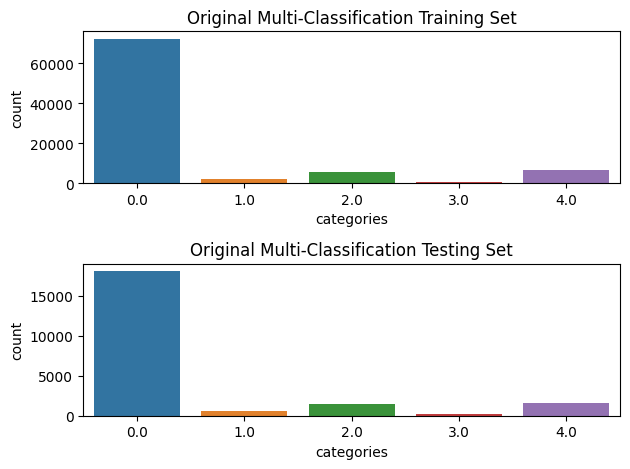

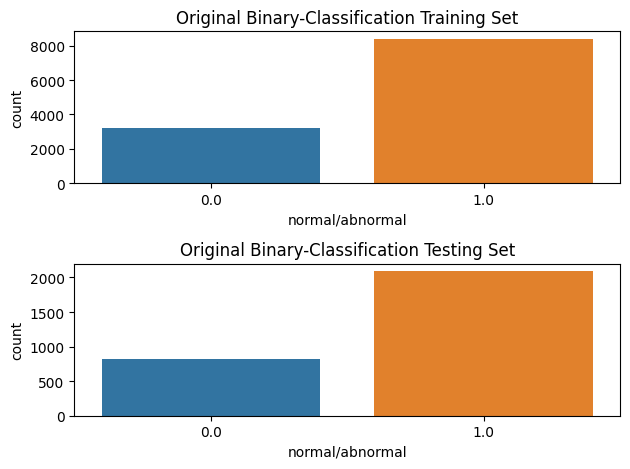

In [3]:
x_multi,x_multi_test,y_multi,y_multi_test=utils.import_set(oversampling=True,
                                                           binary_set=False)

x_bin,x_bin_test,y_bin,y_bin_test=utils.import_set(oversampling=True,
                                                   binary_set=True)

Time elapsed: 3m 18.1s

# Models declarations

In [4]:
model_multi_cnn=tf.keras.Sequential()
model_multi_mlp=tf.keras.Sequential()
model_bin_cnn=tf.keras.Sequential()
model_bin_mlp=tf.keras.Sequential()

utils.archi_cnn(model_multi_cnn,binary=False)
utils.archi_cnn(model_bin_cnn,binary=True)
utils.archi_mlp(model_multi_mlp,binary=False)
utils.archi_mlp(model_bin_mlp,binary=True)

Time elapsed: 2.5s

# Models optimizer and loss function declarations

In [5]:
model_multi_cnn.compile('adam','sparse_categorical_crossentropy',metrics=['accuracy'])
model_multi_mlp.compile('adam','sparse_categorical_crossentropy',metrics=['accuracy'])
model_bin_cnn.compile('adam','binary_crossentropy',metrics=['accuracy'])
model_bin_mlp.compile('adam','binary_crossentropy',metrics=['accuracy'])

Time elapsed: 0.5s

# Trainning

## Multi-Classification

### Multi-Classification CNN with oversampling model training


In [6]:
res_multi_cnn=model_multi_cnn.fit(x_multi.reshape([x_multi.shape[0], 187, 1]),
                                  y_multi,batch_size=multi_batch_size,
                                  epochs=multi_epochs,verbose=verbosity,
                                  validation_split=val_split)

Time elapsed: 42m 45.2s

### Multi-Classification MLP with oversampling model training

In [7]:
res_multi_mlp=model_multi_mlp.fit(x_multi,y_multi,batch_size=multi_batch_size,
                                  epochs=multi_epochs,verbose=verbosity,
                                  validation_split=val_split)

Time elapsed: 2m 51.2s

## Binary-Classification

### Binary-Classification CNN with oversampling model training

In [8]:
res_bin_cnn=model_bin_cnn.fit(x_bin.reshape([x_bin.shape[0], 187, 1]),
                              y_bin,batch_size=bin_batch_size,epochs=bin_epochs,
                              verbose=verbosity,validation_split=val_split)

Time elapsed: 11m 15.2s

### Binary-Classification MLP with oversampling model training

In [9]:
res_bin_mlp=model_bin_mlp.fit(x_bin,y_bin,batch_size=bin_batch_size,
                              epochs=bin_epochs,verbose=verbosity,
                              validation_split=val_split)

Time elapsed: 53.6s

# Results

## Multi-Classification Results

### Multi-Classification CNN with oversampling Model Results

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     18118
         1.0       0.73      0.60      0.65       556
         2.0       0.94      0.91      0.93      1448
         3.0       0.49      0.85      0.62       162
         4.0       0.96      0.99      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.82      0.86      0.83     21892
weighted avg       0.97      0.97      0.97     21892

Multi-Class-CNN evaluation:
loss = 0.13102902472019196
accuarcy = 0.9658322930335999


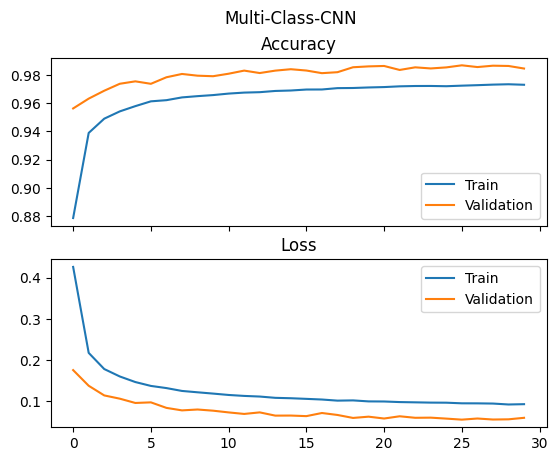

In [10]:
utils.evaluate('Multi-Class-CNN',res_multi_cnn,
                x_multi_test.reshape([x_multi_test.shape[0],187,1]),
                y_multi_test,is_multi=True,verbose=verbosity)

Time elapsed: 4.3s

### Multi-Classification MLP with oversampling Model Results

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     18118
         1.0       0.76      0.60      0.67       556
         2.0       0.93      0.84      0.88      1448
         3.0       0.72      0.64      0.68       162
         4.0       0.98      0.92      0.95      1608

    accuracy                           0.96     21892
   macro avg       0.87      0.80      0.83     21892
weighted avg       0.96      0.96      0.96     21892

Multi-Class-MLP evaluation:
loss = 0.15909039974212646
accuarcy = 0.9611730575561523


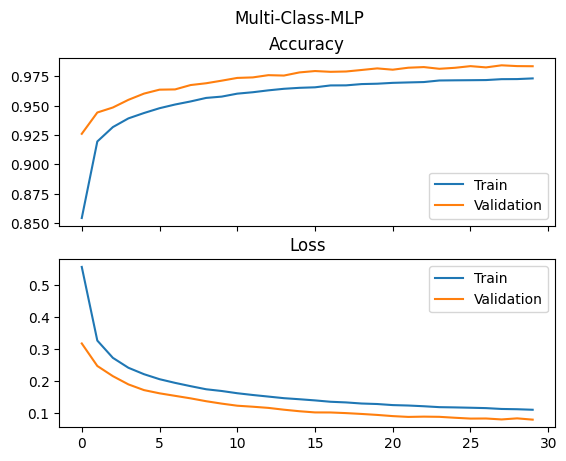

In [11]:
utils.evaluate('Multi-Class-MLP',res_multi_mlp,x_multi_test,y_multi_test,
                is_multi=True,verbose=verbosity)

Time elapsed: 1.8s

## Binary-Classification Results

### Binary-Classification CNN with oversampling Model Results

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       818
         1.0       1.00      0.99      0.99      2093

    accuracy                           0.99      2911
   macro avg       0.99      0.99      0.99      2911
weighted avg       0.99      0.99      0.99      2911

Binary-Class-CNN evaluation:
loss = 0.0375625379383564
accuarcy = 0.9900377988815308


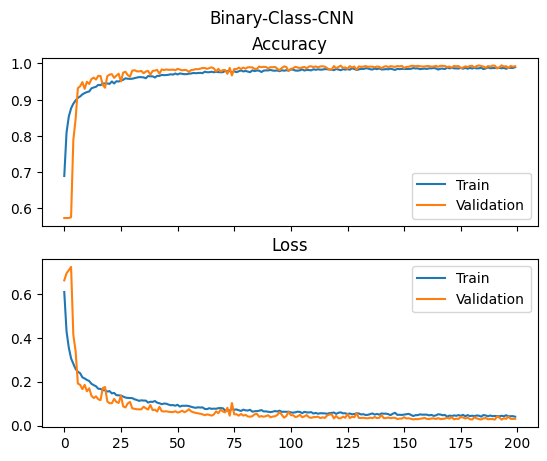

In [12]:
utils.evaluate('Binary-Class-CNN',res_bin_cnn,
                x_bin_test.reshape([x_bin_test.shape[0],187,1]),
                y_bin_test,is_multi=False,verbose=verbosity)

Time elapsed: 0.9s

### Binary-Classification MLP with oversampling Model Results

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       818
         1.0       0.98      0.97      0.97      2093

    accuracy                           0.96      2911
   macro avg       0.95      0.96      0.96      2911
weighted avg       0.96      0.96      0.96      2911

Binary-Class-MLP evaluation:
loss = 0.12964512407779694
accuarcy = 0.9639298915863037


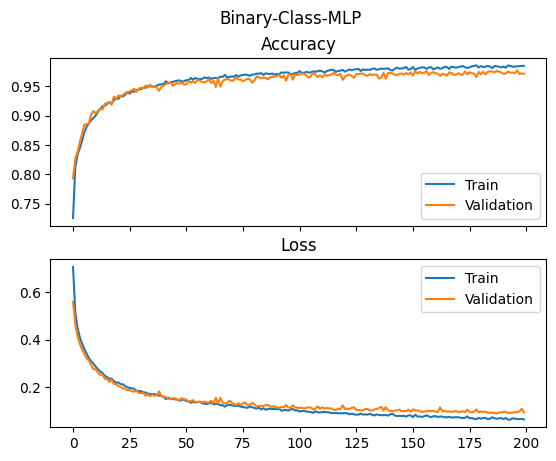

In [13]:
utils.evaluate('Binary-Class-MLP',res_bin_mlp,x_bin_test,
                y_bin_test,is_multi=False,verbose=verbosity)

Time elapsed: 0.6s